In [2]:
from ModelTeacher import ModelTeacher
import tensorflow as tf
from sklearn.model_selection import train_test_split

import Settings
from DataGenerator import DataGenerator
import CnnModel as cnnModel

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.version

<module 'tensorflow._api.v2.version' from 'c:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [6]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [7]:
mt = ModelTeacher()

ids = mt.load_IDs()
ids_train, ids_test = train_test_split(ids, test_size= (1 - Settings.train_split), random_state=42)
gen_train = DataGenerator(ids_train)
gen_test = DataGenerator(ids_test)

In [8]:
model = cnnModel.create_model()

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
history = mt.teach_model(model, gen_train, [callback], 12)

Epoch 1/8
3322/3322 [==============================] - 1421s 425ms/step - loss: 11.7128 - avg_acc: 0.5554
Epoch 2/8
3322/3322 [==============================] - 1347s 404ms/step - loss: 8.3594 - avg_acc: 0.7060
Epoch 3/8
3322/3322 [==============================] - 1317s 395ms/step - loss: 7.8592 - avg_acc: 0.7066
Epoch 4/8
1972/3322 [================>.............] - ETA: 9:53 - loss: 7.5242 - avg_acc: 0.7081

KeyboardInterrupt: 

In [9]:
mt.save_weights(model)

In [9]:
model = cnnModel.create_model()
model.load_weights(Settings.weights_path)

In [12]:
pred = mt.test_model(model, gen_test, 12)

369/369 [==============================] - 162s 426ms/step


In [13]:
model.evaluate(x=gen_test)

369/369 [==============================] - 251s 678ms/step - loss: 6.5167 - avg_acc: 0.7188


[6.516726493835449, 0.7188416123390198]

In [10]:
from PredictionGenerator import PredictionGenerator
from AudioPreprocessor import AudioPreprocessor

a = AudioPreprocessor()

audio = a.process_audiofile('./audio_2022-09-15_14-10-56.mp3')
dima_gen  = PredictionGenerator(audio)
out = model.predict(dima_gen)

3/3 [==============================] - 2s 13ms/step


In [11]:
len(audio)

500

In [12]:
out[0].shape

(6, 21)

In [52]:
out[0][0]

array([9.6810615e-01, 4.5915931e-03, 4.1387700e-03, 4.5396038e-03,
       5.1863827e-03, 2.9532227e-03, 1.3368332e-03, 2.9942191e-03,
       1.5182265e-03, 5.8812922e-04, 9.1532961e-04, 8.5903046e-04,
       4.4966041e-04, 3.8460630e-04, 2.1902412e-04, 3.4634231e-04,
       1.6511425e-04, 8.6372427e-05, 1.5532231e-04, 2.6810530e-04,
       1.9786840e-04], dtype=float32)

In [13]:
import OutputBeautifier as ob

b_out = ob.beautify_outputs(out)

In [14]:
import numpy as np

indd = 110

print(np.around(out[indd]))
print()
print(b_out[indd])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [38]:
secs = []
with open("./dima_out.txt", mode='w') as dima:
    for i in range(len(b_out)):
        if b_out[i][0][0] != 1 or b_out[i][1][0] != 1 or b_out[i][2][0] != 1 or b_out[i][3][0] != 1 or b_out[i][4][0] != 1 or b_out[i][5][0] != 1:
            dima.write(str(i * Settings.hop_length / Settings.sr_downs) + 's:\n')
            secs.append(i * Settings.hop_length / Settings.sr_downs)
            for j in range(6):
                for k in range(21):
                    dima.write(str(b_out[i][j][k]) + ' ')
                dima.write('\n')
            dima.write('\n')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 190, 7, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 188, 5, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 186, 3, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 1, 64)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 93, 1, 64)         0         
                                                                 
 flatten_1 (Flatten)         (None, 5952)              0         
                                                      

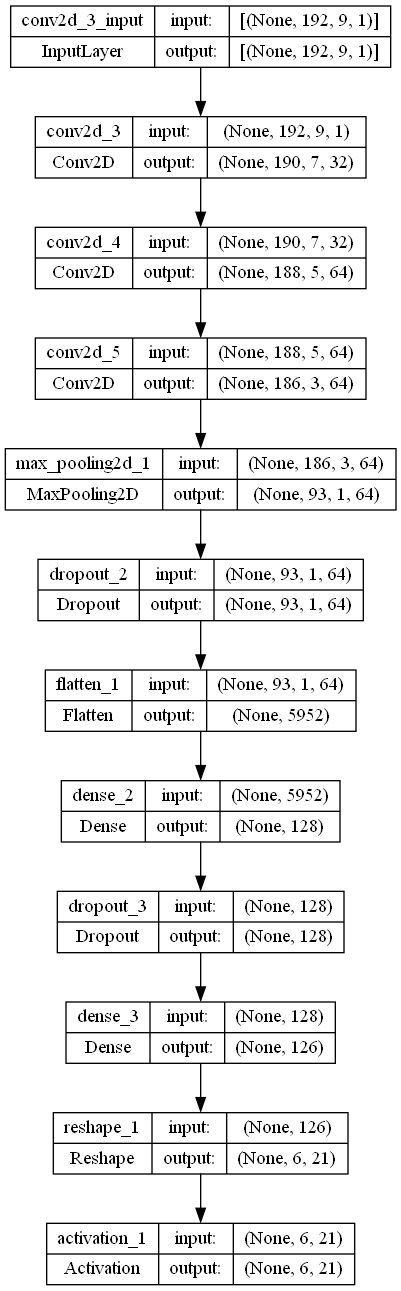

In [17]:
#pip install pydot
#pip install graphviz
import pydot
import graphviz

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

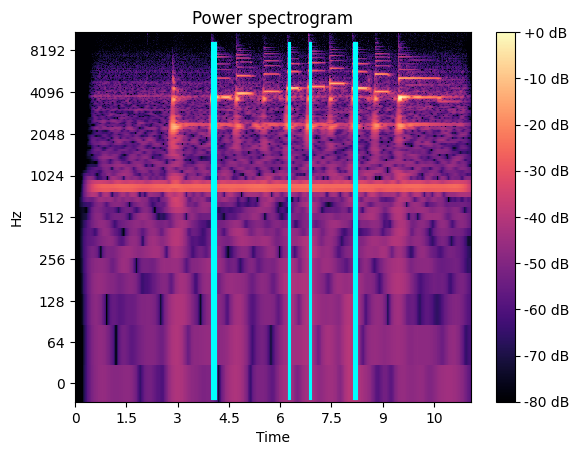

In [39]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.swapaxes(audio, 1, 0),
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
for i in range(len(secs)):
    plt.plot([secs[i], secs], [-25, 9300], color='cyan')
plt.show()

In [25]:
len(audio)

500